![](../assets/img-wordcloud-ai-human-lyrics.webp)

# 1-4 Comparing Texts: An Introduction

In this notebook, we perform our first comparisons of texts, using some simple metrics. 

<div class="alert alert-block alert-info">
Note the use of f-strings when printing output. It's not strictly necessary, but in giving additional context to the outputs, it makes the notebook more human-readable.
</div>

In [4]:
# IMPORTS
import nltk, re

# Open and read the file to create a string object
with open("../data/mdg.txt", mode="r") as f:
    mdg_string = f.read()

# Convert string to list of words
# You can use NLTK's word_tokenize() here instead.
mdg_words = re.sub("[^a-zA-Z']"," ", mdg_string).lower().split()

# Repeat for "Heart of Darkness"
with open("../data/hod.txt", mode="r") as f:
    hod_string = f.read()
hod_words = re.sub("[^a-zA-Z']"," ", hod_string).lower().split()

# Quick check and our first comparison:
print(f"'The Most Dangerous Game' has {len(mdg_words)} words.")
print(f"'Heart of Darkness' has {len(hod_words)} words.")
print(f"HoD is {len(hod_words)/len(mdg_words)} longer.")

'The Most Dangerous Game' has 8017 words.
'Heart of Darkness' has 39208 words.
HoD is 4.890607459149308 longer.


In [5]:
len(set(mdg_words))

1947

### Lexical Diversity

One way to compare texts, which can be achieved relatively simply through some simple math is to take a look at *lexical diversity*. 

Lexical diversity is one way of characterizing a text: it refers to the ratio of unique words (*types*) to the total number of words (*tokens*). The larger the ratio, the more unique words there are, the more "rich" a text is considered to be. Redundancy, or the repeated use of some or many words, is also a positive value and perhaps reflects conventional ways that texts are organized. E.g., song lyrics tend to be highly redundant. 

Lexical diversity can be calculated using a number of different measures including the one we will use here today, Type-Token Ratio (TTR). 

The type token ratio is easy to calculate: unique words divided by total words. (We've seen both these functions before.)

In [6]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv

In [7]:
# Note the use of backslashes to escape the quotation marks.
print(f"The lexical diversity of \"The Most Dangerous Game\" is {lex_div(mdg_words):.3f}")

The lexical diversity of "The Most Dangerous Game" is 0.243


In [8]:
print(f"The lexical diversity of \"Heart of Darkness\" is {lex_div(hod_words):.3f}")

The lexical diversity of "Heart of Darkness" is 0.143


In [9]:
# We need a more robust function to handle a series of files
def lex_div(a_file):
    # open and read the file
    with open(a_file, mode="r") as f:
        the_string = f.read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / len (the_words)
    # return this percentage
    return lexdiv

In [10]:
data = ["A", "B", "C", "D", "E", "F", "G", "H"]

for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    print(f"{i}: {lexdiv:.3f}")

A: 0.326
B: 0.308
C: 0.233
D: 0.283
E: 0.237
F: 0.284
G: 0.259
H: 0.246


*Hmmm* ... that's quite a range. Referring to the lexical diversities for "The Most Dangerous Game" and _Heart of Darkness_, what do you think is at work there? 

What happens if we add a text as a data point?

In [11]:
hamlet = "../data/hamlet.txt"
lex_div(hamlet)

0.13837755875663382

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Write code that explores the possible dimension in play here.
</div>

In [12]:
# We could do this as two lists using code we already know
# "uk" stands for "unknown" because we don't know these texts!

# We already had the lexdiv code
uk_lexdiv = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    uk_lexdiv.append(lexdiv)

# And we can re-use part of the lexdiv code to get this
uk_lengths = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    the_string =  open(the_file, 'r').read()
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    the_length = len(the_words)
    uk_lengths.append(the_length)

print (uk_lexdiv)
print(uk_lengths)



[0.3260437375745527, 0.3077855930147951, 0.23287350946925414, 0.28325647392692443, 0.23655913978494625, 0.2843100189035917, 0.25941612464075026, 0.24635693468198183]
[1509, 4123, 8554, 5638, 6324, 7935, 6611, 5833]


In [13]:

def len_lexdiv(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # get the length of the text in words
    the_length = len(the_words)
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / the_length
    # return the length and the percentage
    return the_length, lexdiv

In [14]:
# Test our code:
len_lexdiv('../data/mdg.txt')

(8017, 0.24285892478483223)

In [15]:
lendivs = []
for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    (x, y) = len_lexdiv(the_file)
    lendivs.append((x,y))

print(lendivs)

[(1509, 0.3260437375745527), (4123, 0.3077855930147951), (8554, 0.23287350946925414), (5638, 0.28325647392692443), (6324, 0.23655913978494625), (7935, 0.2843100189035917), (6611, 0.25941612464075026), (5833, 0.24635693468198183)]


In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)


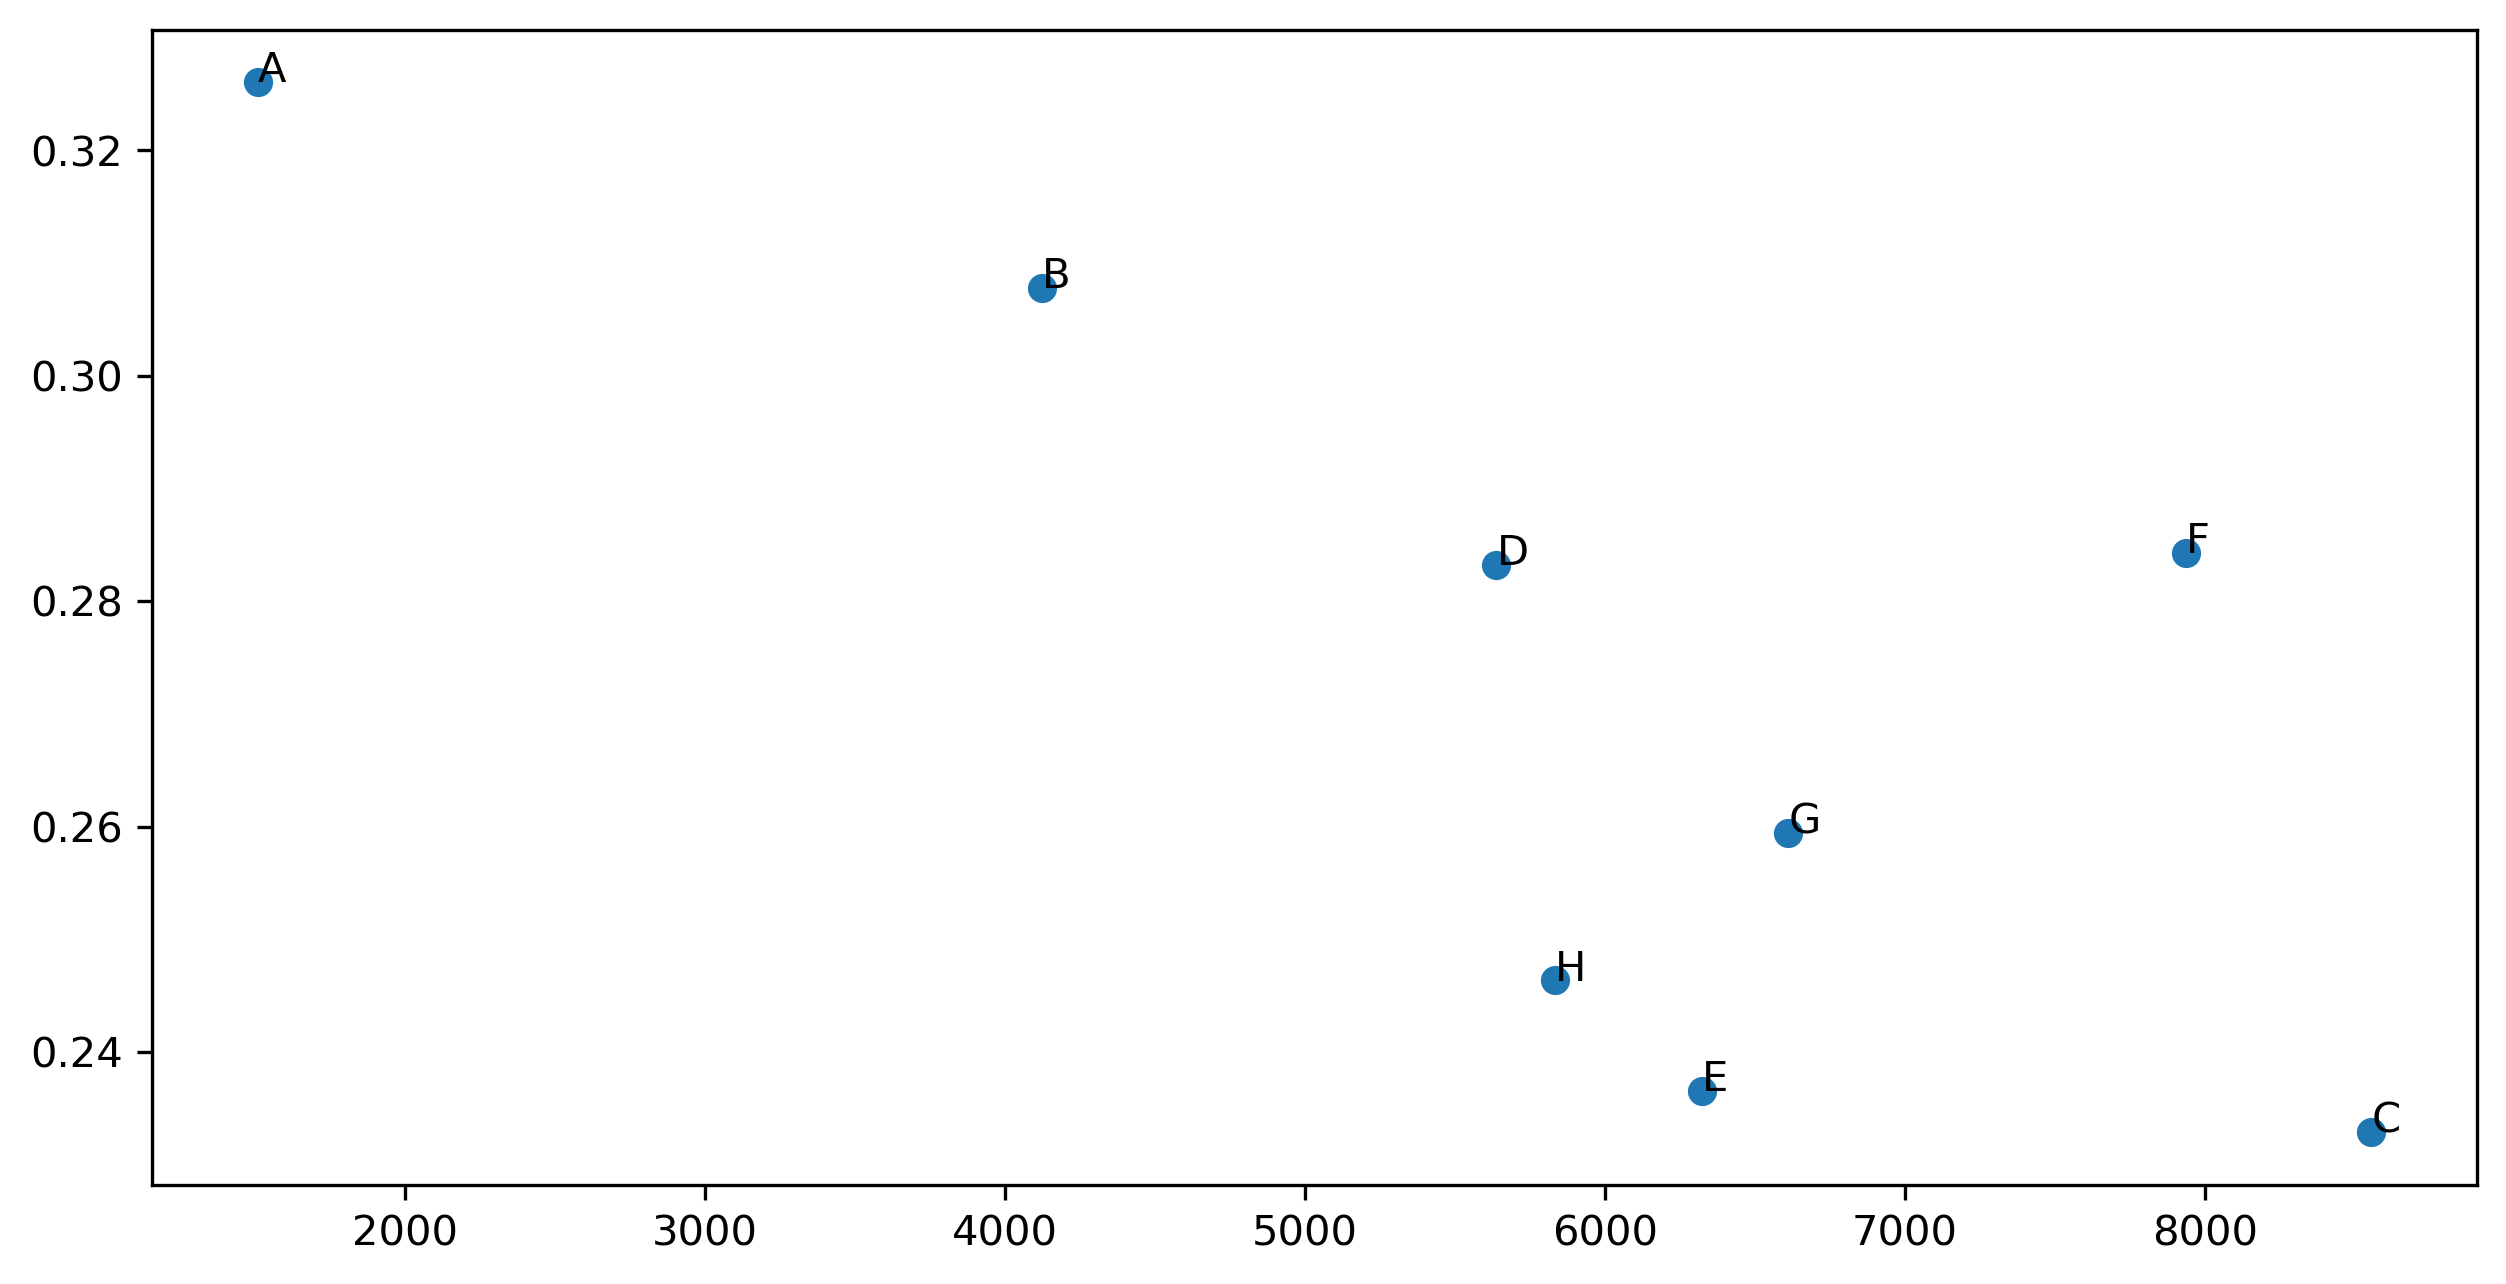

In [17]:
# The usual way to break a tuple into two lists using list comprehensions
# Good for making the values available later in a clear, labeled way
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)
# The short way (Comment out plt.scatter above and then uncomment below)
# plt.scatter(*zip(*lengths_diversities))
plt.show()

In [18]:
# Let's add MDG
lendivs.append(len_lexdiv('../data/mdg.txt'))
data.append("mdg")
print(lendivs[-2:])
print(data[-2:])

[(5833, 0.24635693468198183), (8017, 0.24285892478483223)]
['H', 'mdg']


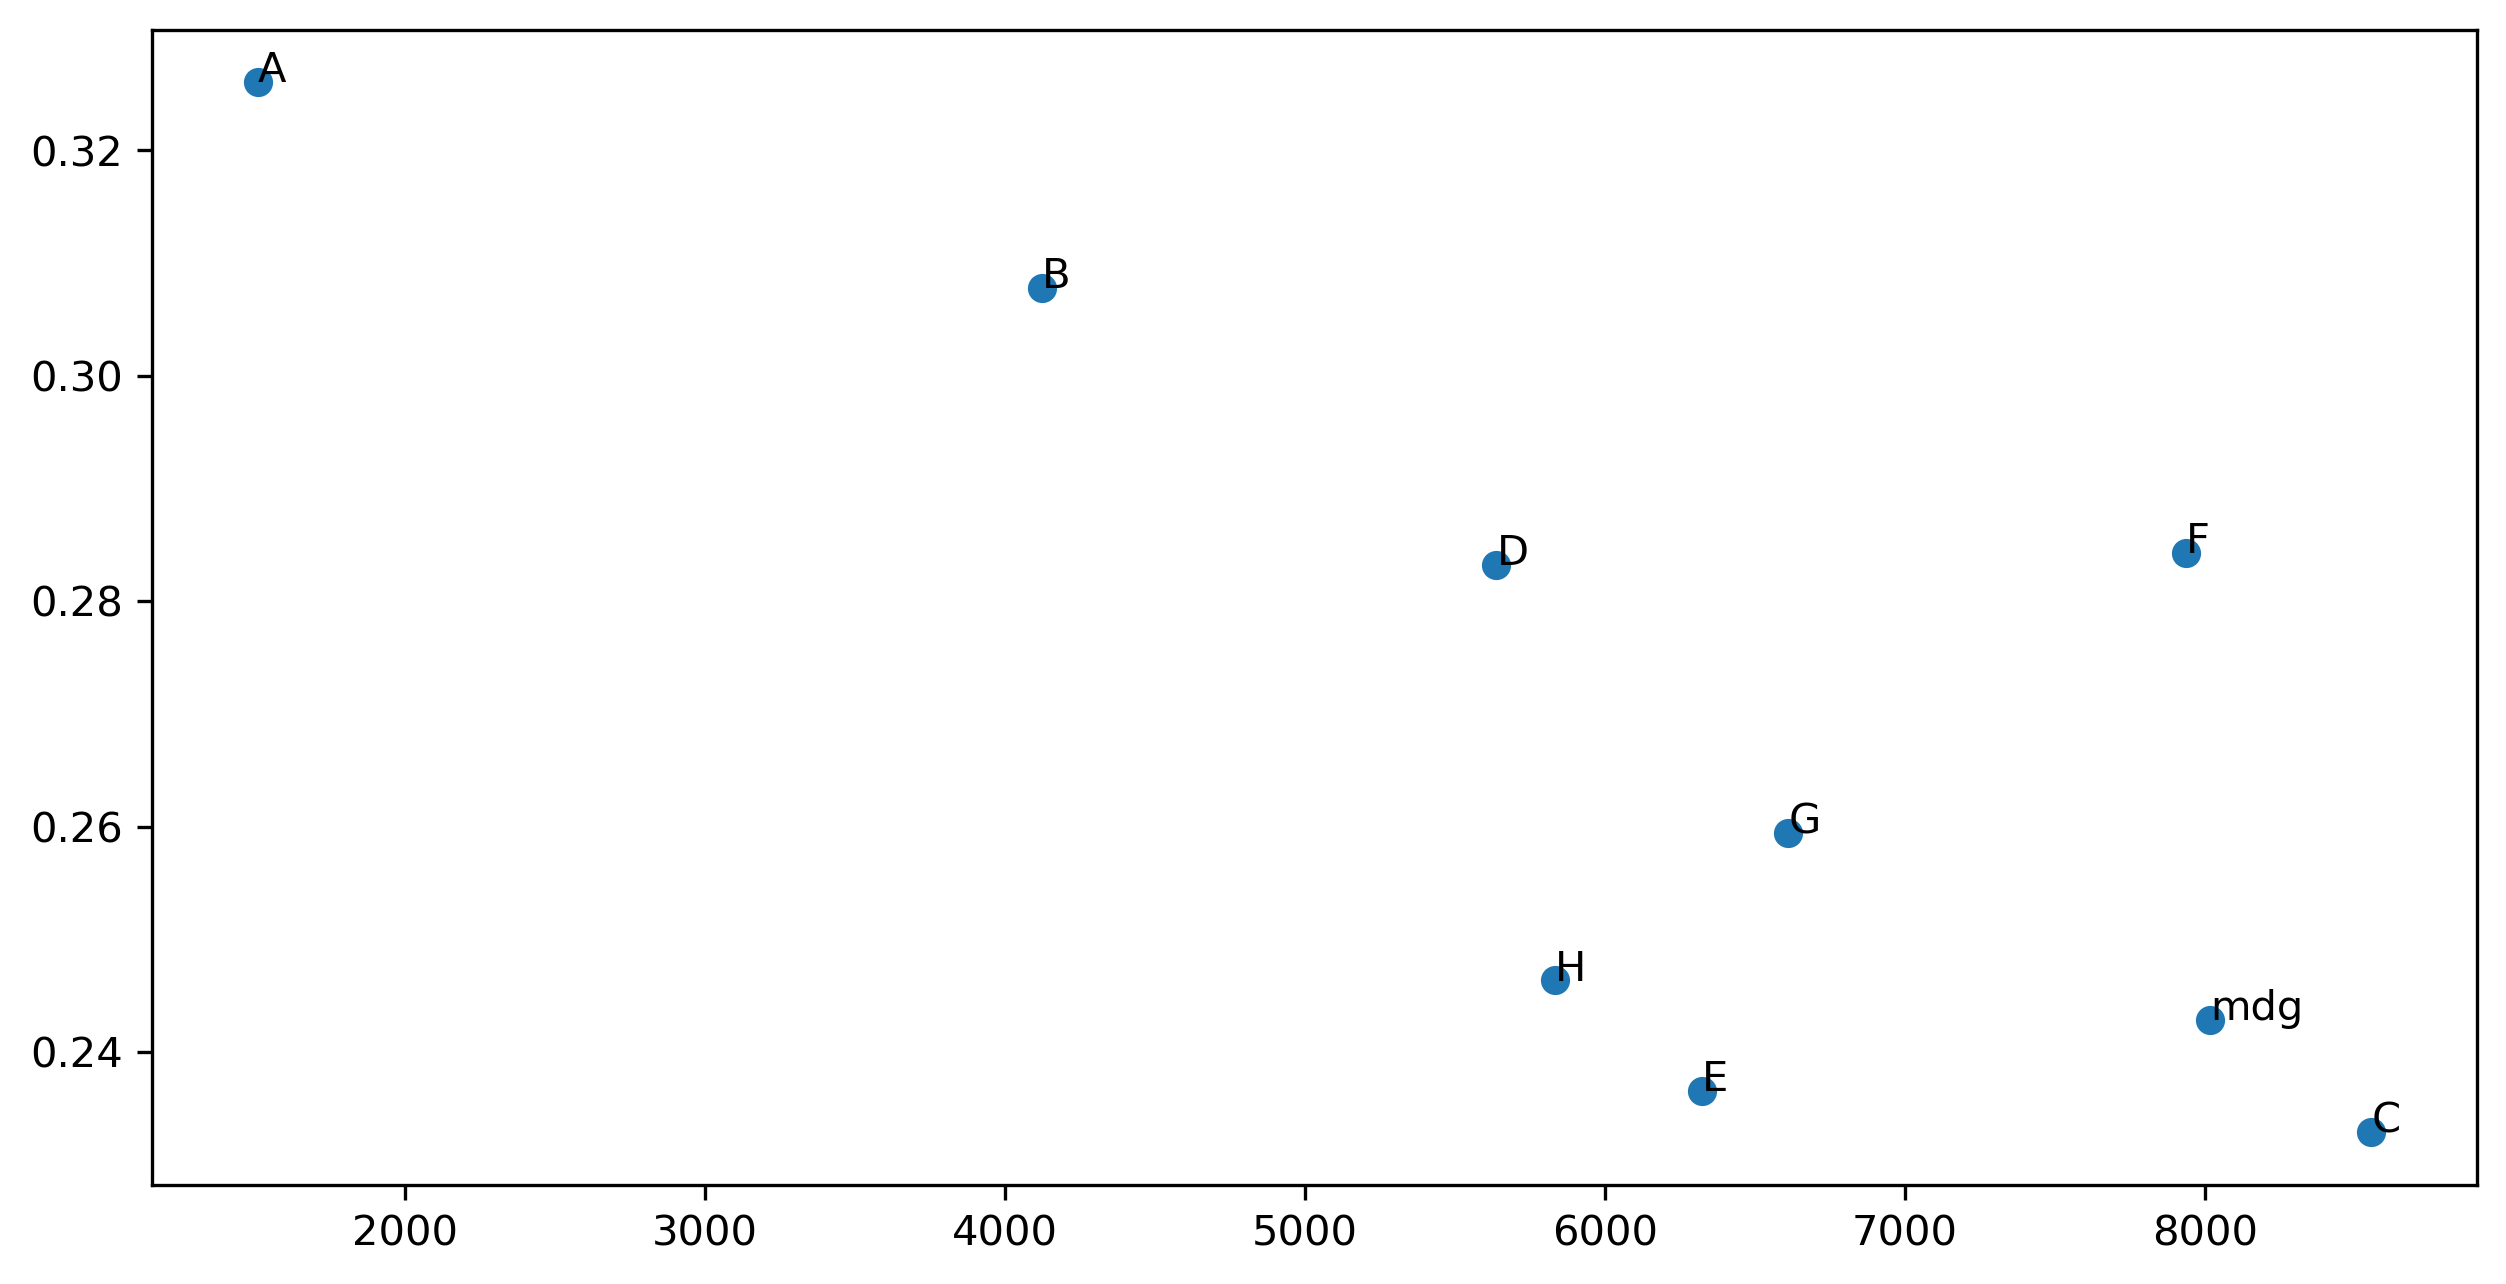

In [19]:
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)

In [20]:
# Now let's add our two longer texts, HoD and Hamlet
texts = ["hod", "hamlet"]
longer = []
for i in texts:
    the_file = "../data/"+i+".txt"
    (x, y) = len_lexdiv(the_file)
    lendivs.append((x,y))
    data.append(i)

# Check our work
print(lendivs[-3:])
print(data[-3:])

[(8017, 0.24285892478483223), (39208, 0.14303203427871863), (32975, 0.13837755875663382)]
['mdg', 'hod', 'hamlet']


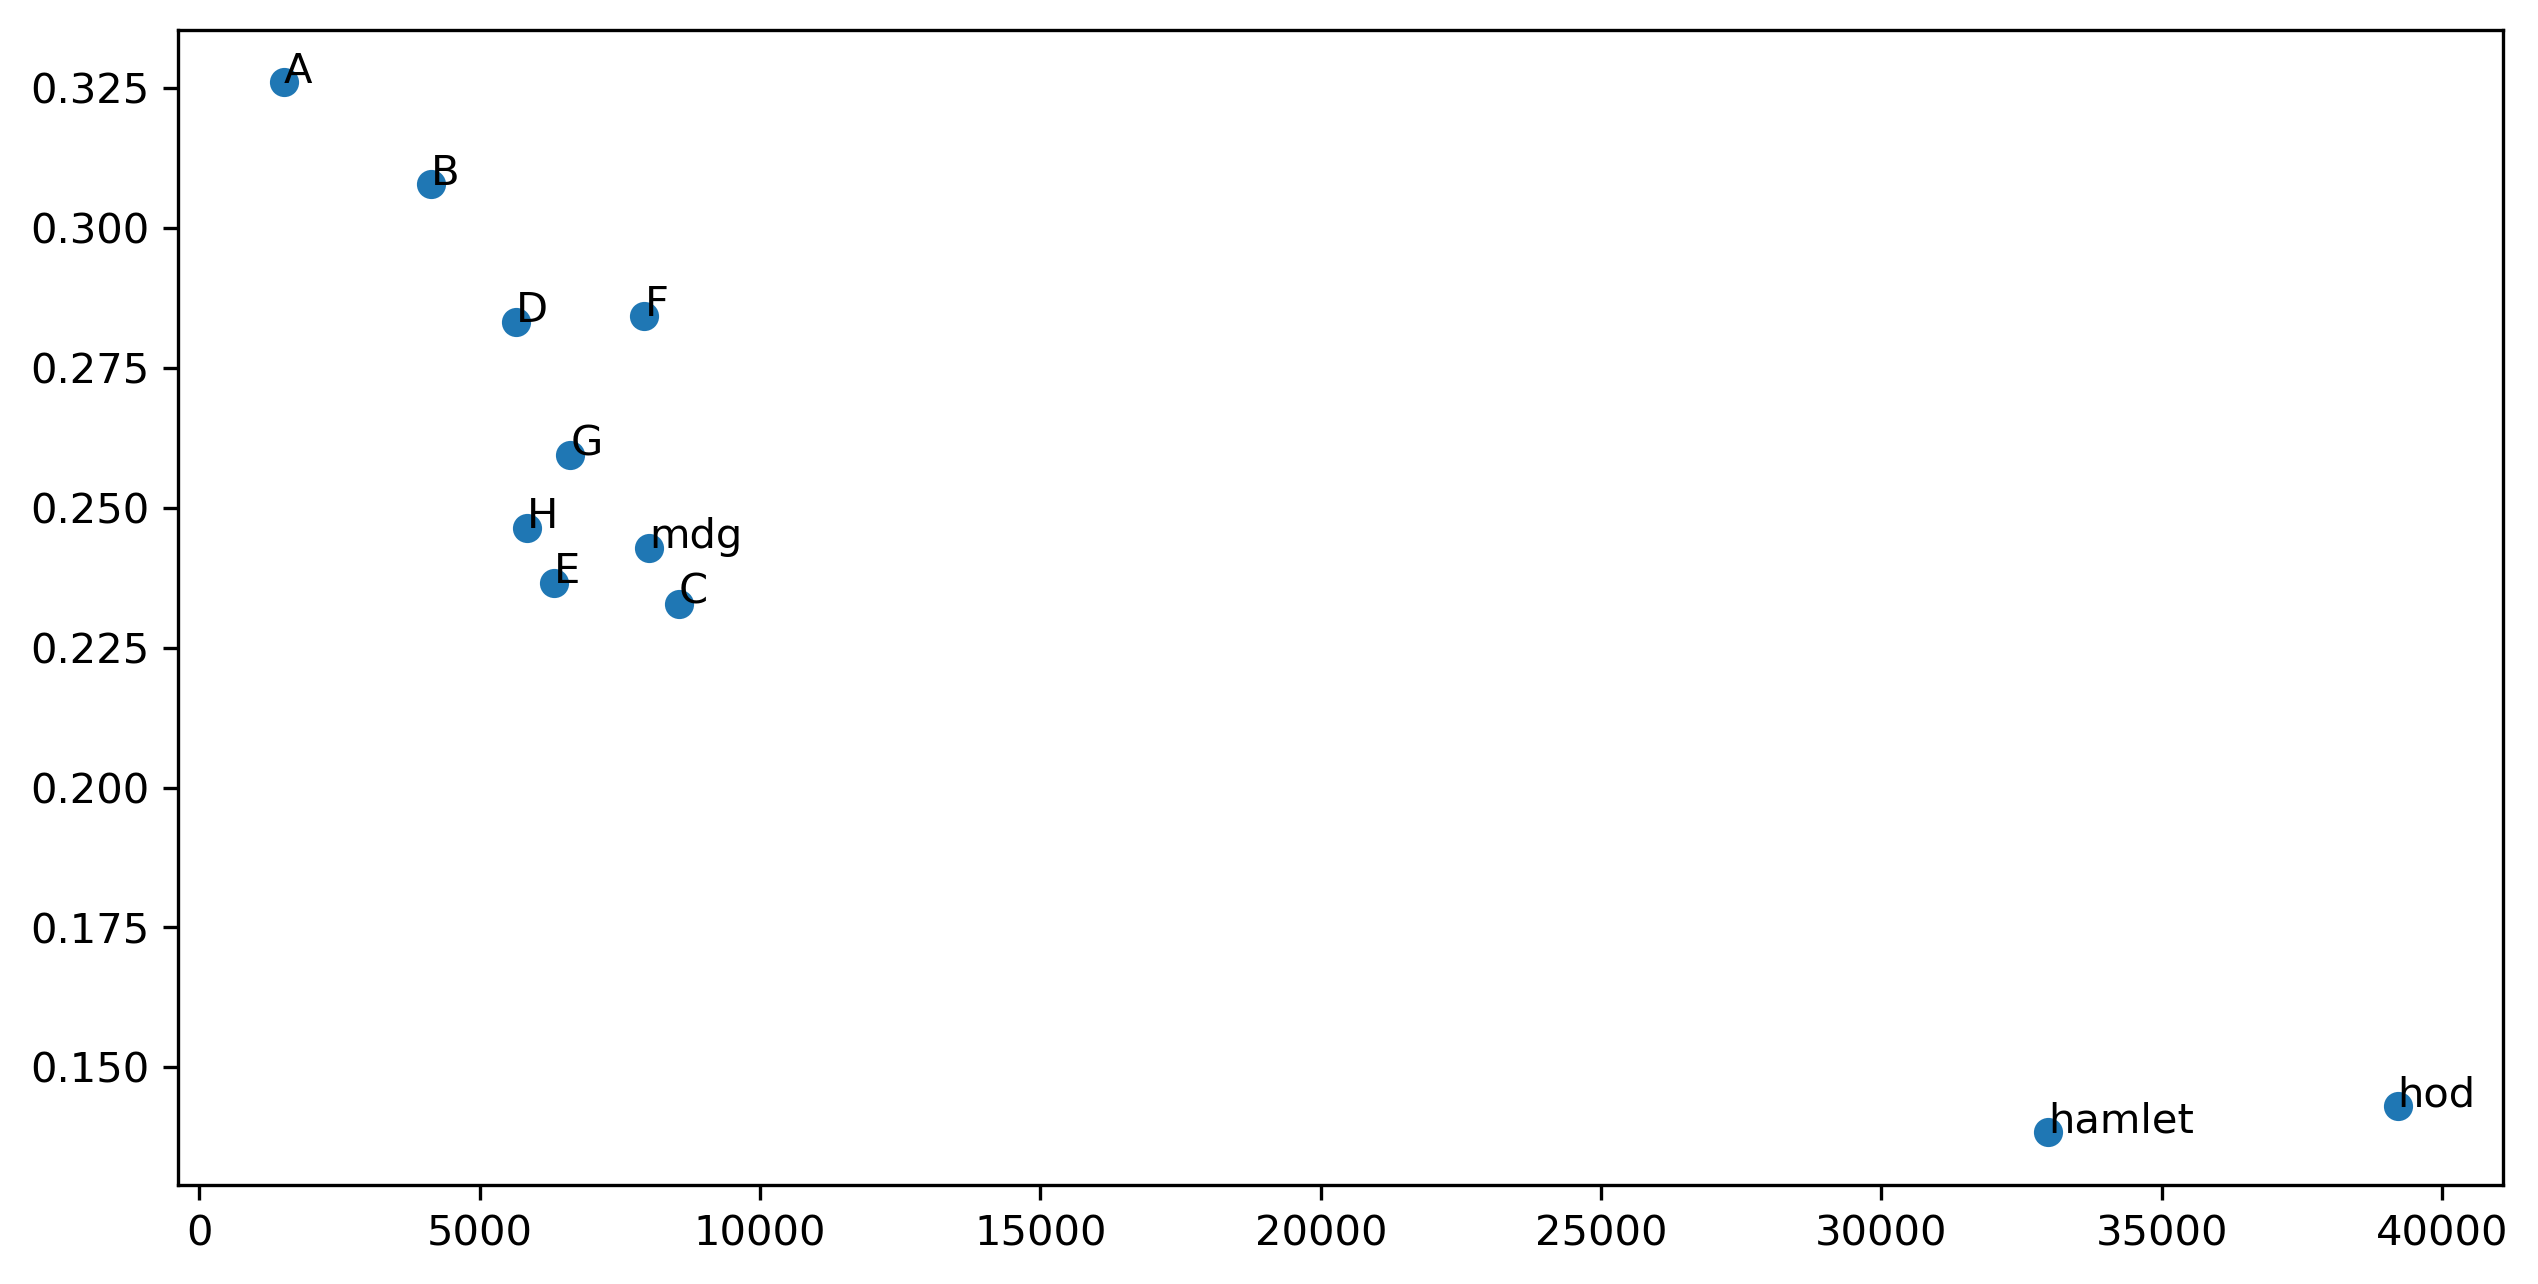

In [21]:
x_val = [x[0] for x in lendivs]
y_val = [x[1] for x in lendivs]
for i, label in enumerate(data):
    plt.annotate(label, (x_val[i], y_val[i]))
plt.scatter(x_val,y_val)